In [48]:
import pandas as pd
import numpy as np
df = pd.read_csv("./hpv/final.csv")
print(df.shape)
for x in df.columns:
    if pd.isna(df[x][0]):
        df = df.drop(x, axis=1)

print(df.shape)
df.head()
without_names = df.columns[df.columns.str.contains("Unnamed")]
df.drop(list(without_names),axis=1,inplace=True)
df = df.drop(1,axis=0)


(41, 67)
(41, 53)


In [ ]:
sample = pd.read_csv("./hpv/final.csv")
sample.columns
think = sample.columns[sample.columns.str.contains("b_")]
another = sample[list(think)]
another

In [61]:
demographic_names = df.columns[df.columns.str.startswith("d_")]
knowledge_names = df.columns[df.columns.str.startswith("k_")]
belief_names = df.columns[df.columns.str.startswith("b_")]

dem = df[demographic_names]
know = df[knowledge_names]
bel = another

In [91]:
for col in list(bel.columns):
    print(col)
    bel.loc[bel[col]== "Yes",col]= "Yes I believe this is true."
    bel.loc[bel[col]== "No I believe this is wrong",col]= "No I believe this is wrong."
    bel.loc[bel[col]== "Yes I believe this is true",col]= "Yes I believe this is true."
    bel.loc[bel[col]== "Maybe",col]= "I am not sure."
    bel.loc[bel[col]== "No",col]= "No I believe this is wrong."
    bel.loc[bel[col]== "No I believe this is a wrong",col]= "No I believe this is wrong."

b_child_vacc
b_discuss_with_child
b_pap
b_ovx
b_vacc_new
b_vac_danger
b_child_sex
b_exposure
b_men_need
b_sex_vacc_effect
b_antibody
b_vacc_risky_sex
b_serious
b_vacc_cancer_prevent
b_discuss_school
b_will_vacc_child
b_pap_1
b_child_vacc_1
b_discuss_with_child_1
b_ovx_1


In [ ]:

bel.columns
pap = list(bel["b_pap"].unique())
print(pap)
def correct_pap(row):
    ans = row["b_pap"]
    print(ans)
    score = 0
    if pap[0] in ans or pap[1] in ans or pap[3] in ans:
        score+=0
    else:
        score+=1
    print(score)
    return score

bel["b_pap_1"] = bel.apply(lambda x:correct_pap(x), axis=1)
bel["b_pap_1"]



In [ ]:
vacc= list(bel["b_child_vacc"].unique())
def correct_child_vacc(row):
    ans = row["b_child_vacc"]
    print(ans)
    score = 0
    if vacc[0] in ans:
        score+=1
    return score

bel["b_child_vacc_1"] = bel.apply(lambda x:correct_child_vacc(x), axis=1)
bel["b_child_vacc_1"]

In [ ]:
dicc= list(bel["b_discuss_with_child"].unique())
print(dicc)
def correct_dicuss_child(row):
    ans = row["b_discuss_with_child"]
    print(ans)
    score = 0
    if dicc[0] in ans:
        score+=1
    return score

bel["b_discuss_with_child_1"] = bel.apply(lambda x:correct_dicuss_child(x), axis=1)
bel["b_discuss_with_child_1"]

In [ ]:
dicc= list(bel["b_ovx"].unique())
print(dicc)
def corrct_ovx(row):
    ans = row["b_ovx"]
    print(ans)
    score = 0
    if dicc[1] in ans:
        score+=1
    return score

bel["b_ovx_1"] = bel.apply(lambda x:corrct_ovx(x), axis=1)
bel["b_ovx_1"]

In [ ]:
dicc= list(bel["b_vacc_new"].unique())
print(dicc)
def correct_vacc_new(row):
    ans = row["b_vacc_new"]
    print(ans)
    score = 0
    if dicc[2] in ans:
        score+=1
    return score

bel["b_vacc_new_1"] = bel.apply(lambda x:correct_vacc_new(x), axis=1)
bel["b_vacc_new_1"]

In [ ]:
dicc= list(bel["b_vac_danger"].unique())
print(dicc)
def correct_vaccdanger(row):
    ans = row["b_vac_danger"]
    print(ans)
    score = 0
    if dicc[2] in ans:
        score+=1
    return score

bel["b_vac_danger_1"] = bel.apply(lambda x:correct_vaccdanger(x), axis=1)
bel["b_vac_danger_1"]

In [ ]:
dicc= list(bel["b_child_sex"].unique())
print(dicc)
def correct_childsex(row):
    ans = row["b_child_sex"]
    print(ans)
    score = 0
    if dicc[1] in ans:
        score+=1
    return score

bel["b_child_sex_1"] = bel.apply(lambda x:correct_childsex(x), axis=1)
bel["b_child_sex_1"]

In [119]:
bel["b_men_need"] = bel["b_men_need"].fillna("I am not sure.")
dicc= list(bel["b_men_need"].unique())
print(dicc)
def correct_menneed(row):
    ans = row["b_men_need"]
    print(ans)
    score = 0
    if dicc[1] in ans:
        score+=1
    return score

bel["b_men_need_1"] = bel.apply(lambda x:correct_menneed(x), axis=1)
bel["b_men_need_1"]

['I am not sure.', 'No I believe this is wrong.', 'Yes I believe this is true.']
I am not sure.
I am not sure.
I am not sure.
I am not sure.
No I believe this is wrong.
I am not sure.
No I believe this is wrong.
No I believe this is wrong.
No I believe this is wrong.
No I believe this is wrong.
No I believe this is wrong.
I am not sure.
No I believe this is wrong.
No I believe this is wrong.
No I believe this is wrong.
I am not sure.
No I believe this is wrong.
No I believe this is wrong.
I am not sure.
Yes I believe this is true.
No I believe this is wrong.
No I believe this is wrong.
No I believe this is wrong.
No I believe this is wrong.
No I believe this is wrong.
No I believe this is wrong.
No I believe this is wrong.
No I believe this is wrong.
No I believe this is wrong.
Yes I believe this is true.
I am not sure.
No I believe this is wrong.
No I believe this is wrong.
Yes I believe this is true.
No I believe this is wrong.
Yes I believe this is true.
No I believe this is wrong.


/tmp/ipykernel_3118/3855715489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bel["b_men_need"] = bel["b_men_need"].fillna("I am not sure.")
/tmp/ipykernel_3118/3855715489.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bel["b_men_need_1"] = bel.apply(lambda x:correct_menneed(x), axis=1)


0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    1
11    0
12    1
13    1
14    1
15    0
16    1
17    1
18    0
19    0
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    0
30    0
31    1
32    1
33    0
34    1
35    0
36    1
37    1
38    0
39    0
40    0
Name: b_men_need_1, dtype: int64

In [117]:
bel["b_men_need"] = bel["b_men_need"].fillna("I am not sure.")

/tmp/ipykernel_3118/917424510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bel["b_men_need"] = bel["b_men_need"].fillna("I am not sure.")


In [105]:
bel.columns

Index(['b_child_vacc', 'b_discuss_with_child', 'b_pap', 'b_ovx', 'b_vacc_new',
       'b_vac_danger', 'b_child_sex', 'b_exposure', 'b_men_need',
       'b_sex_vacc_effect', 'b_antibody', 'b_vacc_risky_sex', 'b_serious',
       'b_vacc_cancer_prevent', 'b_discuss_school', 'b_will_vacc_child',
       'b_pap_1', 'b_child_vacc_1', 'b_discuss_with_child_1', 'b_ovx_1',
       'b_vacc_new_1', 'b_vac_danger_1', 'b_child_sex_1', 'b_exposure_1'],
      dtype='object')

In [6]:
dem["d_gender"]= dem["d_gender"].replace({"Male":1,"Female":0})


/tmp/ipykernel_3118/502474152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dem["d_gender"]= dem["d_gender"].replace({"Male":1,"Female":0})


In [7]:
know_score = know


In [8]:
pos = ["Genital Warts","Cancer of the penis and anus"]
def correct(row):
    answers = row["k_dxm"].split(",")
    answers = [x.strip() for x in answers]
    print(answers)
    score = 0
    if pos[0] in answers:
        score +=1
    if pos[1] in answers:
        score +=1
    return score


know["k_dxm_1"] = know.apply(lambda row:correct(row), axis=1)


['Genital Warts', 'Genital rash']
['Genital Warts', 'Lung cancer']
['Urinary infections', 'Genital Warts']
['Genital Warts', 'Genital rash']
['Genital Warts', 'Genital rash']
['Genital rash', 'Gonorrhea']
['Genital Warts', 'Cancer of the penis and anus']
['Genital Warts', 'Cancer of the penis and anus']
['Genital Warts', 'Genital rash']
['Urinary infections', 'Genital Warts']
['Genital rash', 'Cancer of the penis and anus']
['Genital Warts', 'Genital rash']
['Urinary infections', 'Gonorrhea']
['Genital Warts', 'Cancer of the penis and anus']
['Urinary infections', 'Lung cancer']
['Genital Warts', 'Cancer of the penis and anus']
['Genital Warts', 'Genital rash']
['Genital Warts', 'Cancer of the penis and anus']
['Urinary infections', 'Cancer of the penis and anus']
['Genital rash', 'Cancer of the penis and anus']
['Urinary infections', 'Cancer of the penis and anus']
['Lung cancer', 'Genital rash']
['Urinary infections', 'Cancer of the penis and anus']
['Genital rash', 'Cancer of the pe

/tmp/ipykernel_3118/238379565.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  know["k_dxm_1"] = know.apply(lambda row:correct(row), axis=1)


In [9]:
know["k_transmission"].unique()
options = ["Kissing or having oral sex with the infected person.","Sexual intercourse with the infected individual."]

def correct_transmission(row):
    answers = row["k_transmission"].split(",")
    answers = [x.strip() for x  in answers]
    score = 0
    if options[0] in answers:
        score+=1
    if options[1] in answers:
        score+=1
    return score

know["k_transmission_1"] = know.apply(lambda row:correct_transmission(row), axis=1)

print(know["k_transmission_1"])



0     2
2     1
3     0
4     2
5     2
6     2
7     2
8     2
9     2
10    2
11    2
12    2
13    1
14    1
15    1
16    2
17    1
18    1
19    1
20    2
21    1
22    2
23    2
24    2
25    1
26    2
27    2
28    2
29    2
30    1
31    2
32    1
33    2
34    1
35    1
36    2
37    1
38    2
39    2
40    2
Name: k_transmission_1, dtype: int64


/tmp/ipykernel_3118/3224938723.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  know["k_transmission_1"] = know.apply(lambda row:correct_transmission(row), axis=1)


In [10]:
know["k_protection"].unique()
protection = ["Avoid shaking hands as much as possible.","Use a condom or other protective barriers.","Limit my sexual partners.","Receiving the HPV vaccine."]
def correct_protection(row):
    ans = row["k_protection"].split(",")
    ans =[x.strip() for x in ans]
    score = 0
    if protection[3] in ans:
        score+=3
    if protection[2] in ans:
        score+=2
    if protection[1] in ans:
        score+=1
    return score
know["k_protection_1"] = know.apply(lambda x:correct_protection(x), axis=1)
know["k_protection_1"]



/tmp/ipykernel_3118/2319565310.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  know["k_protection_1"] = know.apply(lambda x:correct_protection(x), axis=1)


0     5
2     0
3     2
4     3
5     3
6     3
7     1
8     2
9     3
10    3
11    2
12    3
13    3
14    3
15    3
16    3
17    1
18    3
19    2
20    2
21    3
22    3
23    2
24    3
25    1
26    3
27    3
28    2
29    3
30    3
31    3
32    3
33    3
34    3
35    1
36    3
37    3
38    3
39    3
40    3
Name: k_protection_1, dtype: int64

In [11]:
know.columns

Index(['k_dxm', 'k_transmission', 'k_protection', 'k_age_range', 'k_heard',
       'k_early_sex', 'k_self_limited', 'k_condom', 'k_multiple_sex',
       'k_early_symptom', 'k_both_gender', 'k_lowrisk', 'k_gen_wart',
       'k_common', 'k_cancer', 'k_symptomatic', 'k_vacc_both', 'k_vacc_effect',
       'k_dxf', 'k_dxm_1', 'k_transmission_1', 'k_protection_1'],
      dtype='object')

In [12]:
age = list(know["k_age_range"].unique())
def correct_age(row):
    ans = row["k_age_range"]
    print(ans)
    score = 0
    if age[4] in ans:
        score-=1
    if age[2] in ans:
        score+=1
    return score

know["k_age_range_1"] = know.apply(lambda x:correct_age(x),axis=1)
print(know["k_age_range_1"])

6-10 years old
6-10 years old
Birth to 5 years old
11 to 26 years old
I am not sure.
I am not sure.
11 to 26 years old
11 to 26 years old
11 to 26 years old
11 to 26 years old
There is no age limit or benefit for HPV vaccination
11 to 26 years old
11 to 26 years old
11 to 26 years old
11 to 26 years old
11 to 26 years old
11 to 26 years old
There is no age limit or benefit for HPV vaccination
11 to 26 years old
11 to 26 years old
11 to 26 years old
11 to 26 years old
6-10 years old
6-10 years old
There is no age limit or benefit for HPV vaccination
11 to 26 years old
11 to 26 years old
There is no age limit or benefit for HPV vaccination
11 to 26 years old
I am not sure.
11 to 26 years old
6-10 years old
11 to 26 years old
I am not sure.
6-10 years old
11 to 26 years old
There is no age limit or benefit for HPV vaccination
11 to 26 years old
11 to 26 years old
I am not sure.
0     0
2     0
3     0
4     1
5     0
6     0
7     1
8     1
9     1
10    1
11   -1
12    1
13    1
14    1


/tmp/ipykernel_3118/2836516641.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  know["k_age_range_1"] = know.apply(lambda x:correct_age(x),axis=1)


In [13]:

standard = ["No","Yes","I am not sure."]
def correct_heard(row):
    ans = row["k_heard"]
    print(ans)
    score = 0
    if standard[1] in ans:
        score+=1
    return score
know["k_heard_1"] = know.apply(lambda x:correct_heard(x), axis=1)
print(know["k_heard_1"])

Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
I am not sure.
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
No
Yes
Yes
Yes
No
Yes
Yes
Yes
No
Yes
No
Yes
No
I am not sure.
Yes
Yes
No
0     1
2     0
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    1
12    1
13    1
14    1
15    0
16    1
17    1
18    1
19    1
20    1
21    0
22    1
23    1
24    0
25    1
26    1
27    1
28    0
29    1
30    1
31    1
32    0
33    1
34    0
35    1
36    0
37    0
38    1
39    1
40    0
Name: k_heard_1, dtype: int64


/tmp/ipykernel_3118/2952068866.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  know["k_heard_1"] = know.apply(lambda x:correct_heard(x), axis=1)


In [14]:
know["k_self_limited"].unique()
vec = ["FALSE","TRUE","I am not sure."]
def correct_early_sex(row):
    ans = row["k_self_limited"]
    print(ans)
    score = 0
    if vec[1] in ans:
        score+=1
    return score
know["k_self_limited_1"] = know.apply(lambda x:correct_early_sex(x), axis=1)
print(know["k_self_limited_1"])


I am not sure.
I am not sure.
FALSE
TRUE
I am not sure.
I am not sure.
TRUE
FALSE
FALSE
I am not sure.
I am not sure.
FALSE
FALSE
I am not sure.
I am not sure.
FALSE
FALSE
I am not sure.
I am not sure.
I am not sure.
I am not sure.
TRUE
I am not sure.
TRUE
FALSE
TRUE
FALSE
FALSE
TRUE
FALSE
FALSE
FALSE
I am not sure.
I am not sure.
I am not sure.
TRUE
I am not sure.
TRUE
I am not sure.
I am not sure.
0     0
2     0
3     0
4     1
5     0
6     0
7     1
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    1
23    0
24    1
25    0
26    1
27    0
28    0
29    1
30    0
31    0
32    0
33    0
34    0
35    0
36    1
37    0
38    1
39    0
40    0
Name: k_self_limited_1, dtype: int64


/tmp/ipykernel_3118/2988342735.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  know["k_self_limited_1"] = know.apply(lambda x:correct_early_sex(x), axis=1)


In [15]:
know["k_early_sex"].unique()
vec = ["FALSE","TRUE","I am not sure."]
def correct_early_sex(row):
    ans = row["k_early_sex"]
    print(ans)
    score = 0
    if vec[1] in ans:
        score+=1
    return score
know["k_early_sex_1"] = know.apply(lambda x:correct_early_sex(x), axis=1)
print(know["k_early_sex_1"])

FALSE
FALSE
FALSE
I am not sure.
TRUE
I am not sure.
TRUE
TRUE
TRUE
TRUE
I am not sure.
I am not sure.
TRUE
I am not sure.
I am not sure.
I am not sure.
TRUE
I am not sure.
I am not sure.
TRUE
I am not sure.
TRUE
FALSE
TRUE
I am not sure.
TRUE
TRUE
FALSE
TRUE
I am not sure.
TRUE
I am not sure.
I am not sure.
I am not sure.
TRUE
TRUE
I am not sure.
FALSE
I am not sure.
TRUE
0     0
2     0
3     0
4     0
5     1
6     0
7     1
8     1
9     1
10    1
11    0
12    0
13    1
14    0
15    0
16    0
17    1
18    0
19    0
20    1
21    0
22    1
23    0
24    1
25    0
26    1
27    1
28    0
29    1
30    0
31    1
32    0
33    0
34    0
35    1
36    1
37    0
38    0
39    0
40    1
Name: k_early_sex_1, dtype: int64


/tmp/ipykernel_3118/331772621.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  know["k_early_sex_1"] = know.apply(lambda x:correct_early_sex(x), axis=1)


In [16]:
know["k_self_limited"].unique()
vec = ["FALSE","TRUE","I am not sure."]
def correct_self_linit(row):
    ans = row["k_self_limited"]
    print(ans)
    score = 0
    if vec[1] in ans:
        score+=1
    return score
know["k_self_limited_1"] = know.apply(lambda x:correct_self_linit(x), axis=1)
print(know["k_self_limited_1"])

I am not sure.
I am not sure.
FALSE
TRUE
I am not sure.
I am not sure.
TRUE
FALSE
FALSE
I am not sure.
I am not sure.
FALSE
FALSE
I am not sure.
I am not sure.
FALSE
FALSE
I am not sure.
I am not sure.
I am not sure.
I am not sure.
TRUE
I am not sure.
TRUE
FALSE
TRUE
FALSE
FALSE
TRUE
FALSE
FALSE
FALSE
I am not sure.
I am not sure.
I am not sure.
TRUE
I am not sure.
TRUE
I am not sure.
I am not sure.
0     0
2     0
3     0
4     1
5     0
6     0
7     1
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    1
23    0
24    1
25    0
26    1
27    0
28    0
29    1
30    0
31    0
32    0
33    0
34    0
35    0
36    1
37    0
38    1
39    0
40    0
Name: k_self_limited_1, dtype: int64


/tmp/ipykernel_3118/594606713.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  know["k_self_limited_1"] = know.apply(lambda x:correct_self_linit(x), axis=1)


In [17]:
know.columns

Index(['k_dxm', 'k_transmission', 'k_protection', 'k_age_range', 'k_heard',
       'k_early_sex', 'k_self_limited', 'k_condom', 'k_multiple_sex',
       'k_early_symptom', 'k_both_gender', 'k_lowrisk', 'k_gen_wart',
       'k_common', 'k_cancer', 'k_symptomatic', 'k_vacc_both', 'k_vacc_effect',
       'k_dxf', 'k_dxm_1', 'k_transmission_1', 'k_protection_1',
       'k_age_range_1', 'k_heard_1', 'k_self_limited_1', 'k_early_sex_1'],
      dtype='object')

In [18]:
know["k_condom"].unique()

array(['TRUE', 'I am not sure.', 'FALSE'], dtype=object)

In [19]:
know["k_condom"].unique()
vec = ["FALSE","TRUE","I am not sure."]
def correct_condom(row):
    ans = row["k_condom"]
    print(ans)
    score = 0
    if vec[1] in ans:
        score+=1
    return score
know["k_condom_1"] = know.apply(lambda x:correct_condom(x), axis=1)
print(know["k_condom_1"])

TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
I am not sure.
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
I am not sure.
TRUE
FALSE
TRUE
TRUE
TRUE
FALSE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
I am not sure.
TRUE
TRUE
I am not sure.
TRUE
FALSE
TRUE
0     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    0
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    0
22    1
23    0
24    1
25    1
26    1
27    0
28    1
29    1
30    1
31    1
32    1
33    1
34    0
35    1
36    1
37    0
38    1
39    0
40    1
Name: k_condom_1, dtype: int64


/tmp/ipykernel_3118/1604299463.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  know["k_condom_1"] = know.apply(lambda x:correct_condom(x), axis=1)


In [20]:
vec = ["FALSE","TRUE","I am not sure."]
def correct_multiple_sex(row):
    ans = row["k_multiple_sex"]
    print(ans)
    score = 0
    if vec[0] in ans:
        score+=1
    return score
know["k_multiple_sex_1"] = know.apply(lambda x:correct_multiple_sex(x), axis=1)
print(know["k_multiple_sex_1"])

FALSE
FALSE
TRUE
TRUE
FALSE
FALSE
FALSE
FALSE
TRUE
FALSE
TRUE
FALSE
FALSE
FALSE
FALSE
FALSE
FALSE
FALSE
FALSE
FALSE
FALSE
FALSE
FALSE
FALSE
I am not sure.
FALSE
FALSE
FALSE
FALSE
FALSE
FALSE
FALSE
FALSE
I am not sure.
FALSE
TRUE
FALSE
FALSE
FALSE
FALSE
0     1
2     1
3     0
4     0
5     1
6     1
7     1
8     1
9     0
10    1
11    0
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    0
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    0
35    1
36    0
37    1
38    1
39    1
40    1
Name: k_multiple_sex_1, dtype: int64


/tmp/ipykernel_3118/3428676528.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  know["k_multiple_sex_1"] = know.apply(lambda x:correct_multiple_sex(x), axis=1)


In [21]:
know["k_early_symptom"]
vec = ["FALSE","TRUE","I am not sure."]
def correct_multiple_sex(row):
    ans = row["k_early_symptom"]
    print(ans)
    score = 0
    if vec[0] in ans:
        score+=1
    return score
know["k_early_symptom_1"] = know.apply(lambda x:correct_multiple_sex(x), axis=1)
print(know["k_early_symptom_1"])

FALSE
I am not sure.
TRUE
TRUE
I am not sure.
TRUE
FALSE
FALSE
I am not sure.
I am not sure.
I am not sure.
FALSE
TRUE
I am not sure.
FALSE
I am not sure.
TRUE
I am not sure.
TRUE
FALSE
FALSE
FALSE
FALSE
FALSE
I am not sure.
I am not sure.
I am not sure.
FALSE
FALSE
I am not sure.
FALSE
FALSE
FALSE
I am not sure.
FALSE
TRUE
I am not sure.
FALSE
TRUE
I am not sure.
0     1
2     0
3     0
4     0
5     0
6     0
7     1
8     1
9     0
10    0
11    0
12    1
13    0
14    0
15    1
16    0
17    0
18    0
19    0
20    1
21    1
22    1
23    1
24    1
25    0
26    0
27    0
28    1
29    1
30    0
31    1
32    1
33    1
34    0
35    1
36    0
37    0
38    1
39    0
40    0
Name: k_early_symptom_1, dtype: int64


/tmp/ipykernel_3118/4017037214.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  know["k_early_symptom_1"] = know.apply(lambda x:correct_multiple_sex(x), axis=1)


In [22]:
vec = ["FALSE","TRUE","I am not sure."]
def correct_both_gender(row):
    ans = row["k_both_gender"]
    print(ans)
    score = 0
    if vec[1] in ans:
        score+=1
    return score
know["k_both_gender_1"] = know.apply(lambda x:correct_both_gender(x), axis=1)
print(know["k_both_gender_1"])

TRUE
TRUE
I am not sure.
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
I am not sure.
TRUE
TRUE
TRUE
I am not sure.
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
I am not sure.
0     1
2     1
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    0
12    1
13    1
14    1
15    0
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    0
Name: k_both_gender_1, dtype: int64


/tmp/ipykernel_3118/3072240730.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  know["k_both_gender_1"] = know.apply(lambda x:correct_both_gender(x), axis=1)


In [23]:
vec = ["FALSE","TRUE","I am not sure."]
def correct_lowrisk(row):
    ans = row["k_lowrisk"]
    print(ans)
    score = 0
    if vec[1] in ans:
        score+=1
    return score
know["k_lowrisk_1"] = know.apply(lambda x:correct_lowrisk(x), axis=1)
print(know["k_lowrisk_1"])

I am not sure
FALSE
I am not sure
I am not sure.
TRUE
I am not sure.
TRUE
I am not sure.
FALSE
TRUE
I am not sure.
TRUE
FALSE
I am not sure.
I am not sure.
I am not sure.
I am not sure.
I am not sure.
I am not sure.
TRUE
I am not sure.
TRUE
I am not sure.
TRUE
I am not sure.
TRUE
FALSE
I am not sure.
FALSE
I am not sure.
TRUE
FALSE
I am not sure.
I am not sure.
I am not sure.
TRUE
I am not sure.
TRUE
TRUE
I am not sure.
0     0
2     0
3     0
4     0
5     1
6     0
7     1
8     0
9     0
10    1
11    0
12    1
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    1
21    0
22    1
23    0
24    1
25    0
26    1
27    0
28    0
29    0
30    0
31    1
32    0
33    0
34    0
35    0
36    1
37    0
38    1
39    1
40    0
Name: k_lowrisk_1, dtype: int64


/tmp/ipykernel_3118/39249606.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  know["k_lowrisk_1"] = know.apply(lambda x:correct_lowrisk(x), axis=1)


In [24]:
vec = ["FALSE","TRUE","I am not sure."]
def correct_genwart(row):
    ans = row["k_gen_wart"]
    print(ans)
    score = 0
    if vec[1] in ans:
        score+=1
    return score
know["k_gen_wart_1"] = know.apply(lambda x:correct_genwart(x), axis=1)
print(know["k_gen_wart_1"])

TRUE
FALSE
I am not sure.
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
I am not sure.
TRUE
TRUE
TRUE
I am not sure.
TRUE
TRUE
TRUE
TRUE
TRUE
I am not sure.
TRUE
I am not sure.
TRUE
TRUE
TRUE
FALSE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
I am not sure.
TRUE
TRUE
TRUE
TRUE
TRUE
I am not sure.
0     1
2     0
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    0
12    1
13    1
14    1
15    0
16    1
17    1
18    1
19    1
20    1
21    0
22    1
23    0
24    1
25    1
26    1
27    0
28    1
29    1
30    1
31    1
32    1
33    1
34    0
35    1
36    1
37    1
38    1
39    1
40    0
Name: k_gen_wart_1, dtype: int64


/tmp/ipykernel_3118/554334330.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  know["k_gen_wart_1"] = know.apply(lambda x:correct_genwart(x), axis=1)


In [25]:
vec = ["FALSE","TRUE","I am not sure."]
def correct_common(row):
    ans = row["k_common"]
    print(ans)
    score = 0
    if vec[1] in ans:
        score+=1
    return score
know["k_common_1"] = know.apply(lambda x:correct_common(x), axis=1)
print(know["k_common_1"])

I am not sure.
TRUE
I am not sure.
TRUE
I am not sure.
TRUE
TRUE
I am not sure.
TRUE
TRUE
I am not sure.
I am not sure.
TRUE
TRUE
I am not sure.
I am not sure.
TRUE
I am not sure.
I am not sure.
I am not sure.
I am not sure.
FALSE
I am not sure.
TRUE
I am not sure.
TRUE
I am not sure.
TRUE
TRUE
I am not sure.
TRUE
TRUE
I am not sure.
I am not sure.
I am not sure.
TRUE
I am not sure.
TRUE
TRUE
I am not sure.
0     0
2     1
3     0
4     1
5     0
6     1
7     1
8     0
9     1
10    1
11    0
12    0
13    1
14    1
15    0
16    0
17    1
18    0
19    0
20    0
21    0
22    0
23    0
24    1
25    0
26    1
27    0
28    1
29    1
30    0
31    1
32    1
33    0
34    0
35    0
36    1
37    0
38    1
39    1
40    0
Name: k_common_1, dtype: int64


/tmp/ipykernel_3118/1733740743.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  know["k_common_1"] = know.apply(lambda x:correct_common(x), axis=1)


In [26]:
vec = ["FALSE","TRUE","I am not sure."]
def correct_cancer(row):
    ans = row["k_cancer"]
    print(ans)
    score = 0
    if vec[0] in ans:
        score+=1
    return score
know["k_cancer_1"] = know.apply(lambda x:correct_cancer(x), axis=1)
print(know["k_cancer_1"])

I am not sure
TRUE
I am not sure
FALSE
TRUE
TRUE
TRUE
TRUE
TRUE
FALSE
I am not sure.
TRUE
TRUE
TRUE
I am not sure.
TRUE
I am not sure.
I am not sure.
TRUE
FALSE
TRUE
FALSE
TRUE
TRUE
FALSE
TRUE
I am not sure.
I am not sure.
TRUE
TRUE
FALSE
TRUE
TRUE
I am not sure.
I am not sure.
TRUE
TRUE
FALSE
I am not sure.
I am not sure.
0     0
2     0
3     0
4     1
5     0
6     0
7     0
8     0
9     0
10    1
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    1
21    0
22    1
23    0
24    0
25    1
26    0
27    0
28    0
29    0
30    0
31    1
32    0
33    0
34    0
35    0
36    0
37    0
38    1
39    0
40    0
Name: k_cancer_1, dtype: int64


/tmp/ipykernel_3118/3687327764.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  know["k_cancer_1"] = know.apply(lambda x:correct_cancer(x), axis=1)


In [27]:
vec = ["FALSE","TRUE","I am not sure."]
def correct_symptomatic(row):
    ans = row["k_symptomatic"]
    print(ans)
    score = 0
    if vec[0] in ans:
        score+=1
    return score
know["k_symptomatic_1"] = know.apply(lambda x:correct_symptomatic(x), axis=1)
print(know["k_symptomatic_1"])

FALSE
TRUE
I am not sure.
FALSE
I am not sure.
TRUE
TRUE
FALSE
FALSE
I am not sure.
I am not sure.
FALSE
TRUE
I am not sure.
I am not sure.
TRUE
FALSE
TRUE
TRUE
TRUE
I am not sure.
FALSE
FALSE
FALSE
TRUE
I am not sure.
FALSE
FALSE
FALSE
FALSE
FALSE
FALSE
FALSE
I am not sure.
TRUE
TRUE
TRUE
FALSE
TRUE
I am not sure.
0     1
2     0
3     0
4     1
5     0
6     0
7     0
8     1
9     1
10    0
11    0
12    1
13    0
14    0
15    0
16    0
17    1
18    0
19    0
20    0
21    0
22    1
23    1
24    1
25    0
26    0
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    0
35    0
36    0
37    0
38    1
39    0
40    0
Name: k_symptomatic_1, dtype: int64


/tmp/ipykernel_3118/3447495279.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  know["k_symptomatic_1"] = know.apply(lambda x:correct_symptomatic(x), axis=1)


In [28]:
vec = ["FALSE","TRUE","I am not sure."]
def correct_vacc(row):
    ans = row["k_vacc_both"]
    print(ans)
    score = 0
    if vec[1] in ans:
        score+=1
    return score
know["k_vacc_both_1"] = know.apply(lambda x:correct_vacc(x), axis=1)
print(know["k_vacc_both_1"])

TRUE
I am not sure
TRUE
TRUE
TRUE
TRUE
TRUE
FALSE
TRUE
TRUE
I am not sure.
TRUE
TRUE
TRUE
I am not sure.
TRUE
TRUE
TRUE
TRUE
TRUE
I am not sure.
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
I am not sure.
I am not sure.
TRUE
TRUE
FALSE
TRUE
TRUE
TRUE
TRUE
TRUE
FALSE
I am not sure.
0     1
2     0
3     1
4     1
5     1
6     1
7     1
8     0
9     1
10    1
11    0
12    1
13    1
14    1
15    0
16    1
17    1
18    1
19    1
20    1
21    0
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    0
30    0
31    1
32    1
33    0
34    1
35    1
36    1
37    1
38    1
39    0
40    0
Name: k_vacc_both_1, dtype: int64


/tmp/ipykernel_3118/1456423988.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  know["k_vacc_both_1"] = know.apply(lambda x:correct_vacc(x), axis=1)


In [29]:
vec = ["FALSE","TRUE","I am not sure."]
def correct_vacc_effect(row):
    ans = row["k_vacc_effect"]
    print(ans)
    score = 0
    if vec[1] in ans:
        score+=1
    return score
know["k_vacc_effect_1"] = know.apply(lambda x:correct_vacc_effect(x), axis=1)
print(know["k_vacc_effect_1"])

TRUE
TRUE
FALSE
I am not sure.
I am not sure.
TRUE
TRUE
TRUE
TRUE
I am not sure.
I am not sure.
I am not sure.
TRUE
I am not sure.
I am not sure.
TRUE
TRUE
I am not sure.
I am not sure.
TRUE
I am not sure.
TRUE
FALSE
TRUE
I am not sure.
TRUE
TRUE
TRUE
TRUE
I am not sure.
TRUE
TRUE
TRUE
I am not sure.
TRUE
TRUE
I am not sure.
I am not sure.
I am not sure.
TRUE
0     1
2     1
3     0
4     0
5     0
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    1
14    0
15    0
16    1
17    1
18    0
19    0
20    1
21    0
22    1
23    0
24    1
25    0
26    1
27    1
28    1
29    1
30    0
31    1
32    1
33    1
34    0
35    1
36    1
37    0
38    0
39    0
40    1
Name: k_vacc_effect_1, dtype: int64


/tmp/ipykernel_3118/324696887.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  know["k_vacc_effect_1"] = know.apply(lambda x:correct_vacc_effect(x), axis=1)


In [30]:
vec = ["FALSE","TRUE","I am not sure."]
def correct_vacc_effect(row):
    ans = row["k_vacc_effect"]
    print(ans)
    score = 0
    if vec[1] in ans:
        score+=1
    return score
know["k_vacc_effect_1"] = know.apply(lambda x:correct_vacc_effect(x), axis=1)
print(know["k_vacc_effect_1"])

TRUE
TRUE
FALSE
I am not sure.
I am not sure.
TRUE
TRUE
TRUE
TRUE
I am not sure.
I am not sure.
I am not sure.
TRUE
I am not sure.
I am not sure.
TRUE
TRUE
I am not sure.
I am not sure.
TRUE
I am not sure.
TRUE
FALSE
TRUE
I am not sure.
TRUE
TRUE
TRUE
TRUE
I am not sure.
TRUE
TRUE
TRUE
I am not sure.
TRUE
TRUE
I am not sure.
I am not sure.
I am not sure.
TRUE
0     1
2     1
3     0
4     0
5     0
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    1
14    0
15    0
16    1
17    1
18    0
19    0
20    1
21    0
22    1
23    0
24    1
25    0
26    1
27    1
28    1
29    1
30    0
31    1
32    1
33    1
34    0
35    1
36    1
37    0
38    0
39    0
40    1
Name: k_vacc_effect_1, dtype: int64


/tmp/ipykernel_3118/324696887.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  know["k_vacc_effect_1"] = know.apply(lambda x:correct_vacc_effect(x), axis=1)


In [31]:
know.columns

Index(['k_dxm', 'k_transmission', 'k_protection', 'k_age_range', 'k_heard',
       'k_early_sex', 'k_self_limited', 'k_condom', 'k_multiple_sex',
       'k_early_symptom', 'k_both_gender', 'k_lowrisk', 'k_gen_wart',
       'k_common', 'k_cancer', 'k_symptomatic', 'k_vacc_both', 'k_vacc_effect',
       'k_dxf', 'k_dxm_1', 'k_transmission_1', 'k_protection_1',
       'k_age_range_1', 'k_heard_1', 'k_self_limited_1', 'k_early_sex_1',
       'k_condom_1', 'k_multiple_sex_1', 'k_early_symptom_1',
       'k_both_gender_1', 'k_lowrisk_1', 'k_gen_wart_1', 'k_common_1',
       'k_cancer_1', 'k_symptomatic_1', 'k_vacc_both_1', 'k_vacc_effect_1'],
      dtype='object')

In [32]:
target =["Warts around the genital area"," Cervical cancer"]
def correct_dxf(row):
    ans = row["k_dxf"].split(",")
    [x.strip() for x in ans]
    print(ans)
    score = 0
    if target[1] in ans:
        score+=1
    if target[0] in ans:
        score+=1
    return score
know["k_dxf_1"] = know.apply(lambda x:correct_dxf(x), axis=1)
print(know["k_dxf_1"])

['Warts around the genital area', ' Cervical cancer']
['Urinary infections', ' Warts around the genital area']
['Warts around the genital area', ' Herpes']
['Genital rash', ' Warts around the genital area']
['Genital rash', ' Warts around the genital area']
['Urinary infections', ' Genital rash']
['Warts around the genital area', ' Cervical cancer']
['Warts around the genital area', ' Cervical cancer']
['Warts around the genital area', ' Cervical cancer']
['Urinary infections', ' Genital rash']
['Cancer of the large bowel', ' Herpes']
['Genital rash', ' Warts around the genital area']
['Urinary infections', ' Herpes']
['Cervical cancer', ' Herpes']
['Urinary infections', ' Cervical cancer']
['Genital rash', ' Cervical cancer']
['Warts around the genital area', ' Herpes']
['Genital rash', ' Cervical cancer']
['Urinary infections', ' Warts around the genital area']
['Warts around the genital area', ' Cervical cancer']
['Urinary infections', ' Cervical cancer']
['Warts around the genital 

/tmp/ipykernel_3118/3226370181.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  know["k_dxf_1"] = know.apply(lambda x:correct_dxf(x), axis=1)


In [33]:
know["k_dxf"].unique()

array(['Warts around the genital area, Cervical cancer',
       'Urinary infections, Warts around the genital area',
       'Warts around the genital area, Herpes',
       'Genital rash, Warts around the genital area',
       'Urinary infections, Genital rash',
       'Cancer of the large bowel, Herpes', 'Urinary infections, Herpes',
       'Cervical cancer, Herpes', 'Urinary infections, Cervical cancer',
       'Genital rash, Cervical cancer',
       'Cancer of the large bowel, Cervical cancer',
       'Warts around the genital area, Cancer of the large bowel',
       'Genital rash, Cancer of the large bowel'], dtype=object)

In [34]:
import re
pattern = re.compile(".*_1$")
selected_knows= know.filter(regex=pattern)
print(selected_knows)
know["k_finalscore"] = selected_knows.sum(axis=1)

    k_dxm_1  k_transmission_1  k_protection_1  k_age_range_1  k_heard_1  \
0         1                 2               5              0          1   
2         1                 1               0              0          0   
3         1                 0               2              0          1   
4         1                 2               3              1          1   
5         1                 2               3              0          1   
6         0                 2               3              0          1   
7         2                 2               1              1          1   
8         2                 2               2              1          1   
9         1                 2               3              1          1   
10        1                 2               3              1          0   
11        1                 2               2             -1          1   
12        1                 2               3              1          1   
13        0              

/tmp/ipykernel_3118/94760545.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  know["k_finalscore"] = selected_knows.sum(axis=1)


In [35]:
sample_filter = know.loc[:,lambda x:x.endswith("_1")]
print(sample_filter)

AttributeError: 'DataFrame' object has no attribute 'endswith'

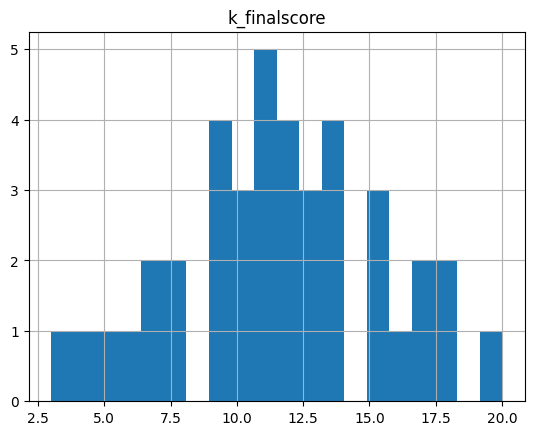

In [ ]:
import matplotlib.pyplot as plt

know.hist("k_finalscore",bins=20)
plt.show()

In [ ]:
know["d_time"] = dem["d_time"]
sample = pd.merge(dem,know,how="left",on="d_time")

/tmp/ipykernel_21538/2346994481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  know["d_time"] = dem["d_time"]


In [ ]:
sample.columns

Index(['d_time', 'd_age', 'd_gender', 'd_family_members', 'd_marital',
       'd_children', 'd_income', 'd_vaccinated', 'd_not_vaccinated',
       'd_reason', 'd_religion', 'd_level', 'k_dxm', 'k_transmission',
       'k_protection', 'k_age_range', 'k_heard', 'k_early_sex',
       'k_self_limited', 'k_condom', 'k_multiple_sex', 'k_early_symptom',
       'k_both_gender', 'k_lowrisk', 'k_gen_wart', 'k_common', 'k_cancer',
       'k_symptomatic', 'k_vacc_both', 'k_vacc_effect', 'k_dxf', 'k_dxm_1',
       'k_transmission_1', 'k_age_range_1', 'k_heard_1', 'k_early_sex_1',
       'k_condom_1', 'k_multiple_sex_1', 'k_early_symptom_1',
       'k_both_gender_1', 'k_lowrisk_1', 'k_gen_wart_1', 'k_common_1',
       'k_cancer_1', 'k_symptomatic_1', 'k_vacc_both_1', 'k_vacc_effect_1',
       'k_dxf_1', 'k_finalscore', 'merge'],
      dtype='object')

In [ ]:
grouped = sample.groupby("d_gender")
fig, ax = plt.subplots()
for name, group in grouped:
    ax.hist(group['k_finalscore'], bins=5, alpha=0.5, label=name)

# add labels and legend to the plot
ax.set_xlabel('Final Score')
ax.set_ylabel('Count')
ax.legend()

# show the plot
plt.show()


In [ ]:
know

In [37]:
bel.head()

,b_child_vacc,b_discuss_with_child,b_pap,b_ovx,b_vacc_new,b_vac_danger,b_child_sex,b_exposure
0,Yes,Yes,Agree,I am not sure.,Yes I believe this is true,I am not sure.,I am not sure.,I am not sure.
2,No,No,Yes I believe this is true,No I believe this is a wrong,No I believe this is wrong.,No I believe this is wrong,No I believe this is wrong,Yes I believe this is true
3,Maybe,No,No I believe this is wrong.,Yes I believe this is true,I am not sure.,Yes I believe this is true,No I believe this is wrong,Yes I believe this is true
4,I am not sure.,I dont have children and I am not planning to ...,Yes I believe this is true.,No I believe this is a wrong,I am not sure.,I am not sure.,I am not sure.,I am not sure.
5,Yes I believe this is true.,I am not sure.,I am not sure.,I am not sure.,I am not sure.,I am not sure.,I am not sure.,I am not sure.


In [38]:
bel.columns

Index(['b_child_vacc', 'b_discuss_with_child', 'b_pap', 'b_ovx', 'b_vacc_new',
       'b_vac_danger', 'b_child_sex', 'b_exposure'],
      dtype='object')